# **CS224W - Colab 1**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started! This Colab should take 1-2 hours to complete.

**Note**: Make sure to **restart and run all** before submission, so that the intermediate variables / packages will carry over to the next cell

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [1]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [2]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

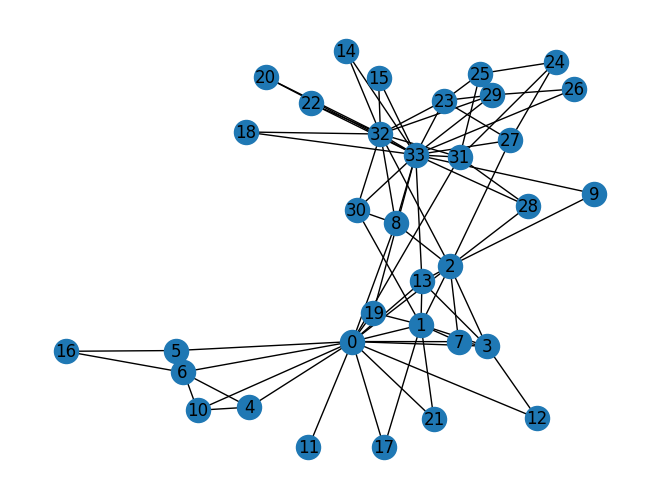

In [3]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (5 Points)

In [4]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of
  # the graph. Round the result to nearest integer (for example
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  avg_degree = avg_degree+ 2*num_edges/num_nodes
  avg_degree = round(avg_degree)
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [5]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0
  avg_cluster_coef= avg_cluster_coef+ nx.average_clustering(G)
  avg_cluster_coef = round(avg_cluster_coef,2)

  ############# Your code here ############
  ## Note:
  ## 1: Please use the appropriate NetworkX clustering function

  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


# Implementation of the Clustering coefficient of the graph from scratch - My own code

In [6]:
def average_clustering(G):
    n = len(G.nodes()) # This tells the length of the number of nodes
    if n == 0:
        return 0
    total = 0
    for node in G.nodes():
        neighbors = list(G.neighbors(node)) # G.neighbors(node) retursn the neighbors connected to the node.
        k = len(neighbors)
        edges_between_neighbors = 0
        for i in range(k):                               # This double loop means it checks the neighbors and then not repeating them self and checks whether we have edge between them or not.
            for j in range(i+1, k):
                if G.has_edge(neighbors[i], neighbors[j]):
                    edges_between_neighbors += 1
        if k >= 2:  # avoid divide by zero
            Cv = (2.0 * edges_between_neighbors) / (k * (k - 1))
            total += Cv
        # if k < 2, Cv = 0 (no contribution)

    return round(total / n, 2)


print(average_clustering(G))


0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Page Rank measures importance of nodes in a graph using the link structure of the web. A “vote” from an important page is worth more. Specifically, if  a page $i$ with importance $r_i$ has $d_i$ out-links, then each link gets $\frac{r_i}{d_i}$ votes. Thus, the importance of a Page $j$, represented as $r_j$ is the sum of the votes on its in links.
$$r_j = \sum_{i \rightarrow j} \frac{r_i}{d_i}$$, where $d_i$ is the out degree of node $i$.

The PageRank algorithm (used by Google) outputs a probability distribution which represent the likelihood of a random surfer clicking on links will arrive at any particular page. At each time step, the random surfer has two options
- With prob. $\beta$, follow a link at random
- With prob. $1- \beta$, jump to a random page

Thus, the importance of a particular page is calculated with the following PageRank equation:
 $$r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$$

Please complete the code block by implementing the above PageRank equation for node 0.

Note - You can refer to more information from the slides here - http://snap.stanford.edu/class/cs224w-2020/slides/04-pagerank.pdf




In [31]:
def one_iter_pagerank(G, beta, r0, node_id):
    """
    One iteration of PageRank for a single node.
    G: nx.Graph
    beta: damping factor
    r0: initial rank (scalar if uniform, or dict if general)
    node_id: node index
    """
    N = G.number_of_nodes()

    # handle uniform initialization
    if isinstance(r0, (int, float)):
        r0_val = {n: r0 for n in G.nodes()}
    else:
        r0_val = r0  # assume dict {node: rank}

    # sum of neighbor contributions
    neighbor_sum = 0.0
    for nbr in G.predecessors(node_id) if G.is_directed() else G.neighbors(node_id):
        deg = G.out_degree(nbr) if G.is_directed() else G.degree(nbr)
        if deg > 0:
            neighbor_sum += r0_val[nbr] / deg

    r1 = (1 - beta) / N + beta * neighbor_sum
    return round(r1, 2)


# Example usage
import networkx as nx
G = nx.karate_club_graph()

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0

r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))


The PageRank value for node 0 after one iteration is 0.13


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [7]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality
  # for a node in karate club network. G is the input karate club
  # network and node is the node id in the graph. Please round the
  # closeness centrality result to 2 decimal places.

  closeness = nx.closeness_centrality(G, node)
    # Round to 2 decimal places


  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized
  ## closeness directly, which is different from the raw (unnormalized)
  ## one that we learned in the lecture.

  ############# Your code here ############

  #########################################

  return round(closeness, 2)

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.38


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [8]:
import torch
print(torch.__version__)

2.8.0+cu126


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [9]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.7772, 0.5358, 0.0361, 0.3751],
        [0.5600, 0.0138, 0.4743, 0.5190],
        [0.4571, 0.8593, 0.7243, 0.6582]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [10]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Get the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

In [13]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected
  # by two nodes.

  edge_list = []

  edge_list = list(G.edges())

  edge_list = tuple(edge_list)


  ############# Your code here ############

  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2, len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  edge_index = torch.tensor(edge_list)
  edge_index = edge_index.type(torch.LongTensor).t().contiguous()
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))
print(pos_edge_index)

# Contiguous - just makes sure the tensor is stored neatly in memory, so later reshaping and graph ops won’t break.
# .t() is basically the transpose of the edge_index


The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 26, 26, 27, 28, 28, 29,
         29, 30, 30, 31, 31, 32],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  2,  3,
          7, 13, 17, 19, 21, 30,  3,  7,  8,  9, 13, 27, 28, 32,  7, 12, 13,  6,
         10,  6, 10, 16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32,
         33, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31, 31, 29, 33, 33, 31, 33, 32,
         33, 32, 33, 32, 33, 33]])


## Question 6: Please implement following function that samples negative edges. Then answer which edges (edge_1 to edge_5) are the negative edges in the karate club network? (10 Points)

"Negative" edges refer to the edges/links that do not exist in the graph. The term "negative" is borrowed from "negative sampling" in link prediction. It has nothing to do with the edge weights.

For example, given an edge (src, dst), you should check that neither (src, dst) nor (dst, src) are edges in the Graph. If these hold true, then it is a negative edge.

In [14]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation
  # works on the karate club network. In this implementation, self loops should
  # not be considered as either a positive or negative edge. Also, notice that
  # the karate club network is an undirected graph, if (0, 1) is a positive
  # edge, do you think (1, 0) can be a negative one?

  nodes = list(G.nodes())
  pos_undirected = {frozenset((u, v)) for (u, v) in G.edges()}
  neg_undirected = set()
  neg_edge_list = []
  while len(neg_edge_list) < num_neg_samples:
        u, v = random.sample(nodes, 2)  # ensures u != v (no self-loop)
        undirected_e = frozenset((u, v))

        # Not an existing edge (in either direction) and not already picked
        if undirected_e not in pos_undirected and undirected_e not in neg_undirected:
            neg_undirected.add(undirected_e)
            # store as an ordered tuple (u, v) — direction doesn’t matter for undirected
            neg_edge_list.append((u, v))


  ############# Your code here ############

  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

def can_be_negative(G, edge):
  # TODO: Implement the function that tests if an edge is a negative
  # edge in graph G.

  is_negative = False

  u, v = edge
  if u == v:
        return False  # s

  is_negative = (not G.has_edge(u, v)) and (not G.has_edge(v, u))

  ############# Your code here ############

  #########################################

  return is_negative

print(f"Edge 1 can be a negative edge: {can_be_negative(G, edge_1)}")
print(f"Edge 2 can be a negative edge: {can_be_negative(G, edge_2)}")
print(f"Edge 3 can be a negative edge: {can_be_negative(G, edge_3)}")
print(f"Edge 4 can be a negative edge: {can_be_negative(G, edge_4)}")
print(f"Edge 5 can be a negative edge: {can_be_negative(G, edge_5)}")

The neg_edge_index tensor has shape torch.Size([2, 78])
Edge 1 can be a negative edge: False
Edge 2 can be a negative edge: True
Edge 3 can be a negative edge: False
Edge 4 can be a negative edge: False
Edge 5 can be a negative edge: True


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.8.0+cu126


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [17]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))


Sample embedding layer: Embedding(4, 8)
Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [18]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 0.3284,  1.7108,  0.0574,  0.1679, -1.0277, -1.3693, -2.1074, -0.1171]],
       grad_fn=<EmbeddingBackward0>)
tensor([[ 0.3284,  1.7108,  0.0574,  0.1679, -1.0277, -1.3693, -2.1074, -0.1171],
        [ 1.7521,  0.8028, -0.7926,  0.3840,  1.0818, -0.6872,  0.2783, -1.0150]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [26]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change
  # the values of num_node and embedding_dim. The weight matrix of returned
  # layer should be initialized under uniform distribution.

  emb = None

  emb = nn.Embedding(num_node, embedding_dim)

  a = (1.0 / embedding_dim) ** 0.5

    # torch.rand() → [0,1), rescale to [-a, a]
  emb.weight.data = torch.rand(num_node, embedding_dim) * (2 * a) - a

  ############# Your code here ############

  #########################################

  return emb


emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[-0.1443,  0.1167, -0.1783,  0.2323, -0.1033,  0.1476,  0.0085, -0.1099,
          0.1669, -0.1908, -0.1323,  0.0300,  0.1983, -0.1071, -0.1522, -0.1596],
        [ 0.1243,  0.0773, -0.0579,  0.2410,  0.0506, -0.0645, -0.0036,  0.2458,
          0.1679, -0.0185,  0.2451,  0.1098, -0.1331, -0.2275,  0.1453,  0.2345]],
       grad_fn=<EmbeddingBackward0>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then we visualize each point, colored by the community it belongs to.

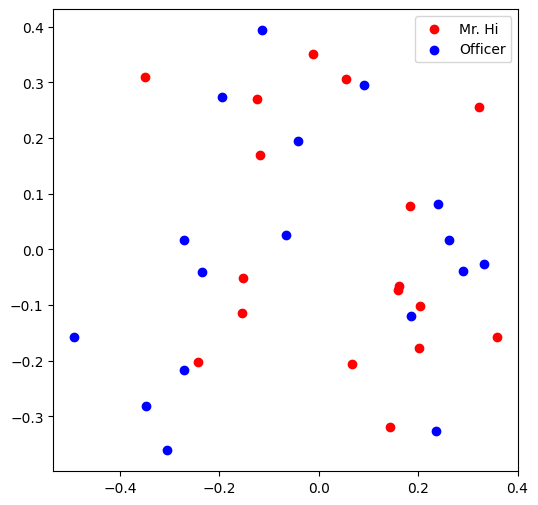

In [27]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## Question 7: Training the embedding! What is the best performance you can get? (20 Points)

We want to optimize our embeddings for the task of classifying edges as positive or negative. Given an edge and the embeddings for each node, the dot product of the embeddings, followed by a sigmoid, should give us the likelihood of that edge being either positive (output of sigmoid > 0.5) or negative (output of sigmoid < 0.5).

Note that we're using the functions you wrote in the previous questions, _as well as the variables initialized in previous cells_. If you're running into issues, make sure your answers to questions 1-6 are correct.

In [29]:
from torch.optim import SGD
import torch
import torch.nn as nn

def accuracy(pred, label):
    """
    pred: probabilities in [0,1] (after sigmoid), shape [E]
    label: ground-truth 0/1 (LongTensor or FloatTensor), shape [E]
    returns: accuracy rounded to 4 decimals
    """
    pred_label = (pred > 0.5).long()
    label = label.long()
    acc = (pred_label == label).float().mean().item()
    return round(acc, 4)

def train(emb, loss_fn, train_label, train_edge):
    """
    Train a dot-product link predictor over an embedding table.
    Steps:
      (1) Lookup embeddings for endpoints in train_edge
      (2) Dot product per edge -> logits
      (3) Sigmoid -> probabilities
      (4) Compute BCELoss(probs, labels)
      (5) Print loss & accuracy
      (6) Backprop + SGD update
    """
    epochs = 500
    learning_rate = 0.1
    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

    emb.train()
    for i in range(epochs):
        optimizer.zero_grad()

        # (1) Node embeddings for each side of the edge
        src, dst = train_edge[0], train_edge[1]     # [E]
        z_src = emb(src)                            # [E, d]
        z_dst = emb(dst)                            # [E, d]

        # (2) Dot product per edge -> logits
        logits = (z_src * z_dst).sum(dim=1)         # [E]

        # (3) Sigmoid -> probabilities
        probs = torch.sigmoid(logits)               # [E]

        # (4) Loss (BCELoss expects probabilities, not logits)
        loss = loss_fn(probs, train_label.float())

        # (5) Accuracy
        acc = accuracy(probs.detach(), train_label)

        # (6) Update
        loss.backward()
        optimizer.step()

        print(f"Epoch {i+1:03d} | Loss: {loss.item():.4f} | Acc: {acc:.4f}")

    return emb

# --- driver code (unchanged) ---
loss_fn = nn.BCELoss()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1])
neg_label = torch.zeros(neg_edge_index.shape[1])

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

train(emb, loss_fn, train_label, train_edge)


torch.Size([2, 78])
torch.Size([2, 156])
Epoch 001 | Loss: 0.0245 | Acc: 1.0000
Epoch 002 | Loss: 0.0245 | Acc: 1.0000
Epoch 003 | Loss: 0.0245 | Acc: 1.0000
Epoch 004 | Loss: 0.0244 | Acc: 1.0000
Epoch 005 | Loss: 0.0244 | Acc: 1.0000
Epoch 006 | Loss: 0.0244 | Acc: 1.0000
Epoch 007 | Loss: 0.0243 | Acc: 1.0000
Epoch 008 | Loss: 0.0243 | Acc: 1.0000
Epoch 009 | Loss: 0.0242 | Acc: 1.0000
Epoch 010 | Loss: 0.0241 | Acc: 1.0000
Epoch 011 | Loss: 0.0241 | Acc: 1.0000
Epoch 012 | Loss: 0.0240 | Acc: 1.0000
Epoch 013 | Loss: 0.0240 | Acc: 1.0000
Epoch 014 | Loss: 0.0239 | Acc: 1.0000
Epoch 015 | Loss: 0.0238 | Acc: 1.0000
Epoch 016 | Loss: 0.0237 | Acc: 1.0000
Epoch 017 | Loss: 0.0237 | Acc: 1.0000
Epoch 018 | Loss: 0.0236 | Acc: 1.0000
Epoch 019 | Loss: 0.0235 | Acc: 1.0000
Epoch 020 | Loss: 0.0234 | Acc: 1.0000
Epoch 021 | Loss: 0.0233 | Acc: 1.0000
Epoch 022 | Loss: 0.0233 | Acc: 1.0000
Epoch 023 | Loss: 0.0232 | Acc: 1.0000
Epoch 024 | Loss: 0.0231 | Acc: 1.0000
Epoch 025 | Loss: 0.023

Embedding(34, 16)

## Visualize the final node embeddings
Visualize your final embedding here!
You can visually compare the figure with the previous embedding figure.
After training, you should oberserve that the two classes are more evidently separated.
This is a great sanitity check for your implementation as well.

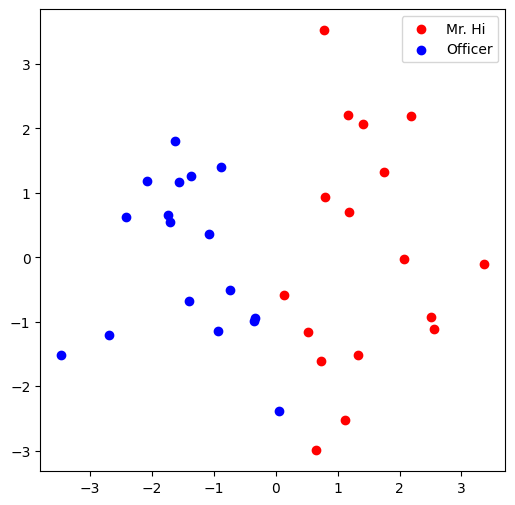

In [30]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

When you submit your assignment, you will have to download this file as an `.ipynb` file. Please name this file `CS224W_Colab_1.ipynb`. Make sure that the files are name correctly, otherwise the autograder will not be able to find your submission files.